In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import Aer, execute
from qiskit.tools.visualization import plot_histogram

In [2]:
a = QuantumRegister(2, 'control')  # input control register
b = QuantumRegister(1, 'target')  # input control register
m = ClassicalRegister(3, 'output')

In [3]:
qc = QuantumCircuit(a)
qc.add_register(b)
qc.add_register(m)

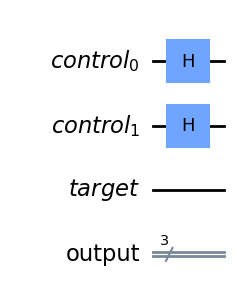

In [4]:
qc.h(a)
qc.draw(output='mpl')

In [5]:
backend =  Aer.get_backend('unitary_simulator')
job = execute(qc, backend, shots=100)  # shots default = 1024
result = job.result()
U = result.get_unitary(qc, 3)
print(result.get_unitary(qc, 3))

Operator([[ 0.5+0.j,  0.5-0.j,  0.5-0.j,  0.5-0.j,  0. +0.j,  0. +0.j,
            0. +0.j,  0. +0.j],
          [ 0.5+0.j, -0.5+0.j,  0.5-0.j, -0.5+0.j,  0. +0.j,  0. +0.j,
            0. +0.j,  0. +0.j],
          [ 0.5+0.j,  0.5-0.j, -0.5+0.j, -0.5+0.j,  0. +0.j,  0. +0.j,
            0. +0.j,  0. +0.j],
          [ 0.5+0.j, -0.5+0.j, -0.5+0.j,  0.5-0.j,  0. +0.j,  0. +0.j,
            0. +0.j,  0. +0.j],
          [ 0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0.5+0.j,  0.5-0.j,
            0.5-0.j,  0.5-0.j],
          [ 0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0.5+0.j, -0.5+0.j,
            0.5-0.j, -0.5+0.j],
          [ 0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0.5+0.j,  0.5-0.j,
           -0.5+0.j, -0.5+0.j],
          [ 0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0.5+0.j, -0.5+0.j,
           -0.5+0.j,  0.5-0.j]],
         input_dims=(2, 2, 2), output_dims=(2, 2, 2))


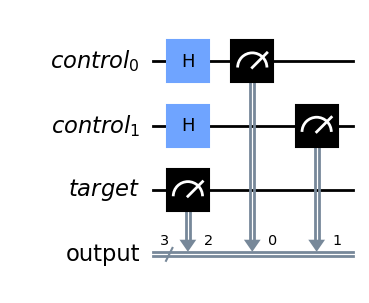

In [6]:
qc.measure(a[0], m[0])
qc.measure(a[1], m[1])
qc.measure(b, m[2])
qc.draw(output='mpl')

In [7]:
backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend, shots=100)  # shots default = 1024
result = job.result()
print(result.get_counts())

{'011': 17, '010': 25, '000': 34, '001': 24}


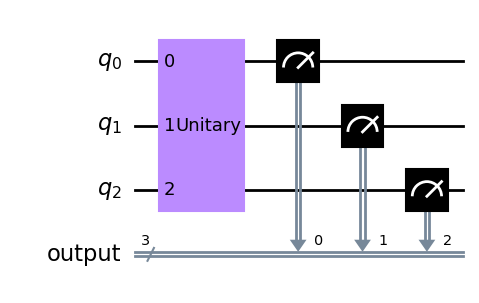

In [8]:
hw_qc = QuantumCircuit(3)
hw_qc.unitary(U, [0, 1, 2])
hw_qc.add_register(m)
hw_qc.measure(0, m[0])
hw_qc.measure(1, m[1])
hw_qc.measure(2, m[2])
hw_qc.draw(output='mpl')

In [9]:
backend = Aer.get_backend('statevector_simulator')
job = execute(hw_qc, backend, shots=100)  # shots default = 1024
result = job.result()
print(result.get_counts())

{'011': 26, '010': 31, '000': 23, '001': 20}


In [11]:
from qiskit import IBMQ
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-ncsu', group='nc-state', project='grad-qc-class')
backend =  provider.get_backend('ibmq_qasm_simulator')
job = execute(hw_qc, backend, shots=100)  # shots default = 1024
result = job.result()
print(result.get_counts())

ibmqfactory.load_account:WARNING:2022-11-21 16:11:12,154: Credentials are already in use. The existing account in the session will be replaced.


{'000': 27, '001': 28, '010': 31, '011': 14}
